In [26]:
!pip install pycaret

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
import json
import pandas as pd
import pickle
from pycaret.clustering import *

# 모델 로드
with open('/content/drive/MyDrive/recommand_data/kmeans_model_3.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# 로드된 모델 사용
# print(loaded_model)

train_df=pd.read_csv("/content/drive/MyDrive/recommand_data/jonse_data.csv")

sampleJson = '{"dongName":"화곡동", "policeOffice":"3","subway":"3", "school":"2", "mart":"2", "bus":"2", "price":"7500"}'
sampleData= json.loads(sampleJson)

police = {"1":0,"2":1,"3":2}
school = {"1":2,"2":4,"3":6}
mart={"1":1,"2":2,"3":3}
subway={"1":0.72,"2":0.5,"3":0.35}
bus={"1":16,"2":23,"3":30}

police_data = police[sampleData["policeOffice"]]
school_data = school[sampleData["school"]]
subway_data = subway[sampleData["subway"]]
mart_data = mart[sampleData["mart"]]
dong_data = sampleData["dongName"]
price=int(sampleData["price"])
bus_data = bus[sampleData["bus"]]

columns = ['ATCLNO', '동', 'PRC', '500m_내_마트수', '500m_내_버스수','500m_내_경찰수', '500m_내_학교수', '가장가까운지하철거리']
data=[["1", dong_data, price, mart_data, bus_data, police_data, school_data, subway_data]]
input_df = pd.DataFrame(data, columns=columns)

clust_df=pd.concat([input_df, train_df]).reset_index(drop=True)

clustering_setup = setup(data=clust_df,
                         normalize=True,
                         ignore_features=['ATCLNO', '동'],
                         session_id=123,
                         verbose=False
                         )
clustered_data = assign_model(loaded_model)


out_df = clustered_data[clustered_data["Cluster"] == clustered_data["Cluster"][0]].reset_index()

out_df=out_df[1:]
out_df['index'] = out_df['index'] - 1
out_df.head()

out_df["ATCLNO"] = train_df["ATCLNO"]
out_df["동"] = train_df["동"]

# 동 필터링
out_df = out_df[out_df["동"] == dong_data]

# price 필터링
out_df = out_df[out_df["PRC"] < (price * 1.2)]

# 정렬
if sampleData["policeOffice"] == "3" :
  out_df.sort_values(by=["500m_내_경찰수"], inplace=True)
if sampleData["school"] == "3" :
  out_df.sort_values(by=["500m_내_학교수"], inplace=True)
if sampleData["subway"] == "3" :
  out_df.sort_values(by=["가장가까운지하철거리"], ascending=False, inplace=True)
if sampleData["bus"] == "3" :
  out_df.sort_values(by=["500m_내_버스수"], inplace=True)
if sampleData["mart"] == "3" :
  out_df.sort_values(by=["500m_내_마트수"], inplace=True)

out_df = out_df[0:10]

# json 변경
json_data = out_df["ATCLNO"].values.tolist()

result = {
    "data" : json_data
}

print(result)

{'data': [2433519907, 2433520119, 2432365320, 2433524988, 2429564228, 2433148723, 2431742847, 2434166523, 2433841002, 2431038674]}


In [38]:
out_df["ATCLNO"].values.tolist()

[2430671984,
 2434097865,
 2430976149,
 2432400350,
 2433977436,
 2432622833,
 2434236321,
 2429895379,
 2432208321,
 2433071424]

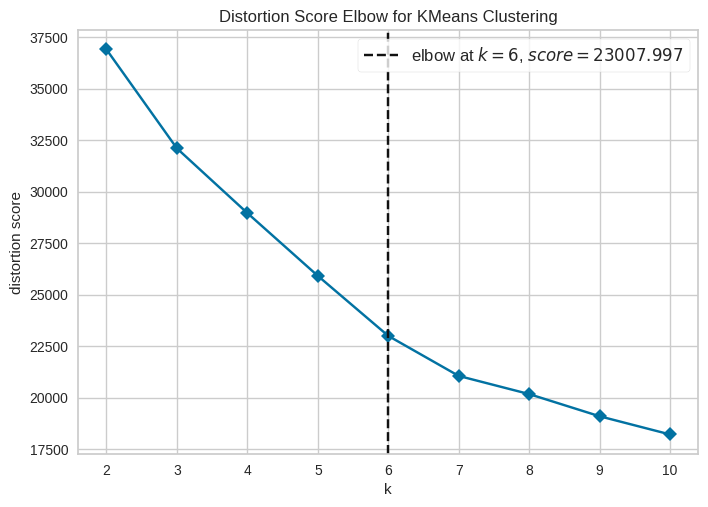

In [47]:
plot_model(loaded_model, plot='elbow')

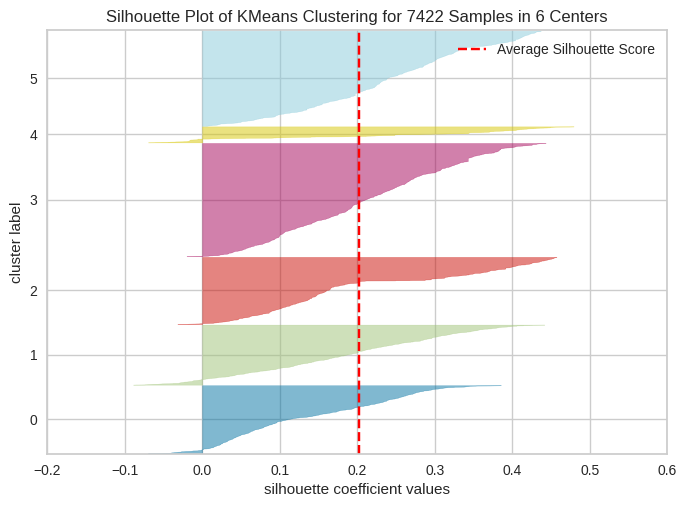

In [48]:
plot_model(loaded_model, plot='silhouette')

In [24]:
out_df

,index,PRC,500m_내_마트수,500m_내_버스수,500m_내_경찰수,500m_내_학교수,가장가까운지하철거리,Cluster,ATCLNO,동
1855,6499,7000,2,41,1,1,0.874238,Cluster 2,2430671984,화곡동
572,2478,6000,2,44,1,4,0.868341,Cluster 2,2434097865,화곡동
11,14,5000,2,24,0,2,0.774551,Cluster 2,2430976149,화곡동
1896,6550,7000,2,33,1,0,0.737630,Cluster 2,2432400350,화곡동
1003,3894,6500,2,29,2,0,0.661407,Cluster 2,2433977436,화곡동
...,...,...,...,...,...,...,...,...,...,...
2039,7100,8000,0,32,1,2,0.211046,Cluster 2,2434664502,화곡동
1734,6175,6000,2,25,1,2,0.171281,Cluster 2,2434166813,화곡동
1569,5635,8000,2,17,0,1,0.169833,Cluster 2,2434207830,화곡동
77,211,4000,2,13,0,1,0.138526,Cluster 2,2431965446,화곡동


In [25]:
out_df["ATCLNO"].to_json(orient='records')

'[2430671984,2434097865,2430976149,2432400350,2433977436,2432622833,2434236321,2429895379,2432208321,2433071424,2433801871,2432362286,2433732047,2434302716,2433794716,2433537063,2434666426,2431546987,2431346363,2434461669,2433705925,2434542401,2433670894,2433609668,2432843347,2430757043,2431970183,2434470776,2429666842,2434197284,2433874717,2429553788,2431160924,2431167433,2432117694,2433977506,2431988628,2431717756,2430652332,2430362732,2433092000,2433135854,2434202687,2433521239,2433562042,2431997176,2431938948,2430542002,2429470286,2431661147,2430063245,2432896980,2432245491,2433472522,2432433687,2432080463,2431270056,2434664502,2434166813,2434207830,2431965446,2433614604]'

In [45]:
import json
import pandas as pd
import pickle
from pycaret.clustering import *

# 모델 로드
with open('kmeans_model_3.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# 로드된 모델 사용
print(loaded_model)

train_df=pd.read_csv("jonse_data.csv")

sampleJson = '{"dongName":"화곡동", "policeOffice":"3","subway":"3", "school":"2", "mart":"2", "bus":"2", "price":"7500"}'
sampleData= json.loads(sampleJson)


police = {"1":0,"2":1,"3":2}
school = {"1":2,"2":4,"3":6}
mart={"1":1,"2":2,"3":3}
subway={"1":0.72,"2":0.5,"3":0.35}
bus={"1":16,"2":23,"3":30}

police_data = police[sampleData["policeOffice"]]
school_data = school[sampleData["school"]]
subway_data = subway[sampleData["subway"]]
mart_data = mart[sampleData["mart"]]
dong_data = sampleData["dongName"]
price=int(sampleData["price"])
bus_data = bus[sampleData["bus"]]

columns = ['ATCLNO', '동', 'PRC', '500m_내_마트수', '500m_내_버스수','500m_내_경찰수', '500m_내_학교수', '가장가까운지하철거리']
data=[["1", dong_data, price, mart_data, bus_data, police_data, school_data, subway_data]]
input_df = pd.DataFrame(data, columns=columns)

clust_df=pd.concat([input_df, train_df]).reset_index(drop=True)

clustering_setup = setup(data=clust_df,
                         normalize=True,
                         ignore_features=['ATCLNO', '동'],
                         session_id=123)
clustered_data = assign_model(loaded_model)


out_df = clustered_data[clustered_data["Cluster"] == clustered_data["Cluster"][0]].reset_index()

out_df=out_df[1:]
out_df['index'] = out_df['index'] - 1
out_df.head()

out_df["ATCLNO"] = train_df["ATCLNO"]
out_df["동"] = train_df["동"]

# 동 필터링
out_df = out_df[out_df["동"] == dong_data]

# price 필터링
out_df = out_df[out_df["PRC"] < (price * 1.2)]

# 정렬
if sampleData["policeOffice"] == "3" :
  out_df.sort_values(by=["500m_내_경찰수"], inplace=True)
if sampleData["school"] == "3" :
  out_df.sort_values(by=["500m_내_학교수"], inplace=True)
if sampleData["subway"] == "3" :
  out_df.sort_values(by=["가장가까운지하철거리"], ascending=False, inplace=True)
if sampleData["bus"] == "3" :
  out_df.sort_values(by=["500m_내_버스수"], inplace=True)
if sampleData["mart"] == "3" :
  out_df.sort_values(by=["500m_내_마트수"], inplace=True)

# json 변경
json_data = out_df["ATCLNO"].to_json(orient='records')

print(json_data)

FileNotFoundError: [Errno 2] No such file or directory: 'kmeans_model_3.pkl'

In [ ]:
import json
import pandas as pd
import pickle
from pycaret.clustering import *
import sys


if __name__ == "__main__":
  try:
    # 모델 로드

    with open('kmeans_model_2.pkl', 'rb') as file:
      loaded_model = pickle.load(file)

    # 로드된 모델 사용
    print(loaded_model)

    train_df=pd.read_csv("jonse_data.csv")

    json_data_str = sys.stdin.read()

    #sampleJson = '{"dongName":"화곡동", "policeOffice":"3","subway":"3", "school":"2", "mart":"2", "bus":"2", "price":"7500"}'
    sampleData= json.loads(json_data_str)
    print(sampleJson)


    police = {"1":0,"2":1,"3":2}
    school = {"1":2,"2":4,"3":6}
    mart={"1":1,"2":2,"3":3}
    subway={"1":0.72,"2":0.5,"3":0.35}
    bus={"1":16,"2":23,"3":30}

    police_data = police[sampleData["policeOffice"]]
    school_data = school[sampleData["school"]]
    subway_data = subway[sampleData["subway"]]
    mart_data = mart[sampleData["mart"]]
    dong_data = sampleData["dongName"]
    price=int(sampleData["price"])
    bus_data = bus[sampleData["bus"]]

    columns = ['ATCLNO', '동', 'PRC', '500m_내_마트수', '500m_내_버스수','500m_내_경찰수', '500m_내_학교수', '가장가까운지하철거리']
    data=[["1", dong_data, price, mart_data, bus_data, police_data, school_data, subway_data]]
    input_df = pd.DataFrame(data, columns=columns)

    clust_df=pd.concat([input_df, train_df]).reset_index(drop=True)

    clustering_setup = setup(data=clust_df,
                            normalize=True,
                            ignore_features=['ATCLNO', '동'],
                            session_id=123)
    clustered_data = assign_model(loaded_model)


    out_df = clustered_data[clustered_data["Cluster"] == clustered_data["Cluster"][0]].reset_index()

    out_df=out_df[1:]
    out_df['index'] = out_df['index'] - 1
    out_df.head()

    out_df["ATCLNO"] = train_df["ATCLNO"]
    out_df["동"] = train_df["동"]

    # 동 필터링
    out_df = out_df[out_df["동"] == dong_data]

    # price 필터링
    out_df = out_df[out_df["PRC"] < (price * 1.2)]

    # 정렬
    if sampleData["policeOffice"] == "3" :
      out_df.sort_values(by=["500m_내_경찰수"], inplace=True)
    if sampleData["school"] == "3" :
      out_df.sort_values(by=["500m_내_학교수"], inplace=True)
    if sampleData["subway"] == "3" :
      out_df.sort_values(by=["가장가까운지하철거리"], ascending=False, inplace=True)
    if sampleData["bus"] == "3" :
      out_df.sort_values(by=["500m_내_버스수"], inplace=True)
    if sampleData["mart"] == "3" :
      out_df.sort_values(by=["500m_내_마트수"], inplace=True)

    # json 변경
    json_data = out_df["ATCLNO"].to_json(orient='records')
    return json_data

  except Exception as e:
    print(f"Error in main function: {e}", file=sys.stderr)
    sys.exit(1)

In [ ]:
if __name__ == "__main__":
    try:
# Read input from stdin
        json_data_str = sys.stdin.read()
        print("Received JSON data:", json_data_str)

        input_df = process_json(json_data_str)
        input_df = infra(input_df)
        predictions = predict(input_df)
        '''
        predicted_labels = predictions['prediction_label'].iloc[0]
        print("Prediction: ",predicted_labels)

        result = {
            "jeonsePrice": float(predicted_labels),
            "infrastructureScore": {
                "school": int(input_df['500m_내_초중등수'].iloc[0]),
                "publicSecurity": int(input_df['발생'].iloc[0]),
                "busStop": int(input_df['500m_내_bus수'].iloc[0]),
                "subway": int(input_df['Closest_Station_Distance'].iloc[0]),
                "mart": int(input_df['500m_내_마트수'].iloc[0])
            }
        }
        json_result = json.dumps(result)
'''
        # 결과 출력

        print(predictions)
        return predictions

    except Exception as e:
        print(f"Error in main function: {e}", file=sys.stderr)
        sys.exit(1)